# UNSUPERVISED LEARNING

## Problem Statement :
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [127]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, kstest

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [128]:
# load the dataset to pandas Data Frame
# Reading the csv file in df variable and printing out first 10 rows using head method
Customers = pd.read_csv("C:\\Users\\Hp\\Desktop\\Refactor_Projects\\Mall_Customers.csv",delimiter=",")
Customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
# Printing out last 10 rows using tail method
Customers.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Observation of Dataset

Shape : Find out the total number of rows and columns in the dataset using “.shape”

In [130]:
#Dataset comprises 800 observations(rows) and 5 features(columns).
#Out of the 5, one is the target variable and rest 7 are input variables.

Customers.shape

(200, 5)

In [131]:
#Data_Types of Each COlumns
Customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [132]:
Customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [133]:
"""Customers.info returns information about the data frame including the data types of each column, 
number of null values in each column and memory usage of the entire data."""

Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The data has only int and Object values.

In [134]:
#Changing the datatype of the column - Gender to category
Customers.Pclass = Customers.Gender.astype('category')

In [135]:
# Looking at the modified datatypes of the dataset
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here, we can see that there are no missing values in the columns.

Let's explore the features/columns of the datasets

In [136]:
for i in Customers.columns:
    print(i)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [137]:
print(len(Customers.columns))

5


In [138]:
Customers['Annual Income (k$)'].nunique()

64

In [139]:
Customers['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [140]:
Customers['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

#### Checking for Missing Values & Checking for Duplicates

In [141]:
Customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Observation: There is no missing value in any column

In [142]:
duplicate = Customers[Customers.duplicated()]
duplicate.shape

(0, 5)

## EDA (Exploratory Data Analysis)

In [143]:
gender_count = Customers['Gender'].value_counts(dropna = False)
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

In [144]:
import plotly.express as px
import plotly.graph_objects as go
fig1 = px.pie(Customers,names='Gender',title='Ratio of Gender Distribution. Clearly There are 12% more Females than Males')
fig1.show()

In [145]:
#which age group has the most customers
fig2 = px.histogram(Customers,x='Age',nbins=15,color='Gender',title='Age group has the most number of customers')
fig2.show()

It is clearly seen Age group 30-34 has more customers,followed by 35-39 and 45-49

In [146]:
#which age Group Spends The most
fig3 = px.histogram(Customers,x='Age',y='Spending Score (1-100)',color='Gender',nbins=15,title='Spending Score Age group wise')
fig3.show()

It is clearly seen Age group 30-34 has a higher spending Score,followed by 35-39 and 20-24

In [147]:
#which age group has the highest annual income
fig4 = px.histogram(Customers,x='Age',y='Annual Income (k$)',nbins=15,color='Gender',title='Annual Income Age Group Wise')
fig4.show()

It is clearly seen Age group 30-34 has a higher Annual Income,followed by 35-39, But Unlike the spending score the Age group 45-49 comes third.

In [148]:
#age distribution
fig5 = px.box(Customers,x='Gender',y='Age',color='Gender')
fig5.show()

Minimum age for both males and females is 18.
Wheresas the average age for males is 37 and for females is 35

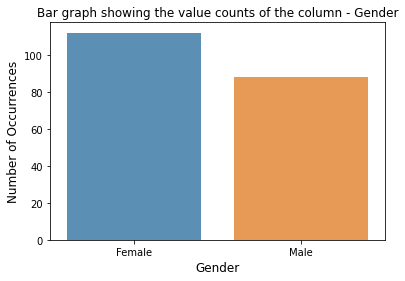

In [149]:
# Bar graph showing the value counts of the column - Gender
sns.barplot(gender_count.index, gender_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customers' of the mall are Female. Now let's see the average Annual Income for each Gender.

In [150]:
# Mean of Annual Income by Gender

gender_income = Customers[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


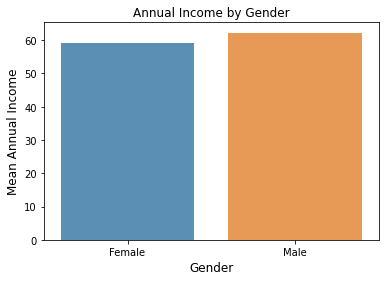

In [151]:
# Mean Annual Income by Gender

sns.barplot(gender_income['Gender'], gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the average annual income is almost similar for both Male and Female

In [152]:
# Mean Spending Score by Gender
gender_score = Customers[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


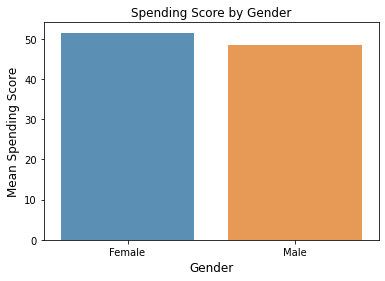

In [153]:
# Mean Spending Score by Gender

sns.barplot(gender_score['Gender'], gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the mean spending score is slightly higher in Female than Male

In [154]:
# Mean Age by Gender

gender_age = Customers[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


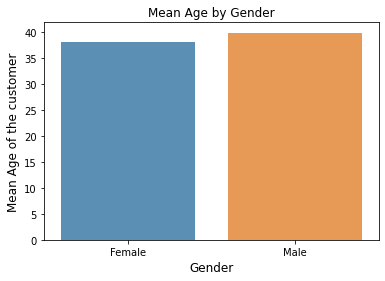

In [155]:
# Mean Age by Gender

sns.barplot(gender_age['Gender'], gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the average age is slightly higher in Male customers than the Female customers

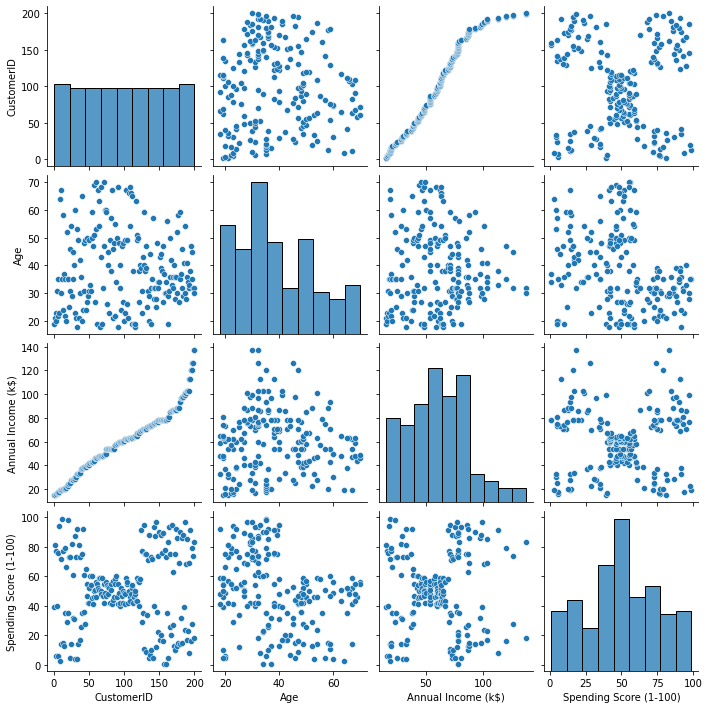

In [156]:
sns.pairplot(Customers)

In [157]:
Customers.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

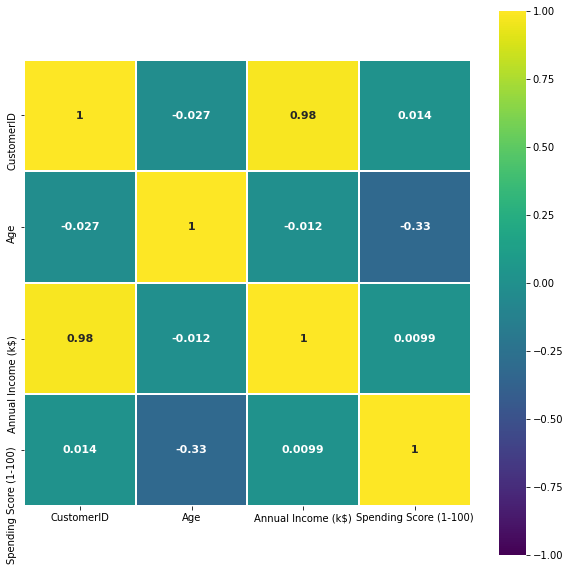

In [158]:
# Correlation Heatmap to fine out highly correlated columns
plt.figure(figsize=(10,10))
sns.heatmap(Customers.corr(),cmap="viridis",vmin=-1,vmax=1,annot=True,
            annot_kws={'fontsize':11,'fontweight':'bold'},square=True,linewidth=0.1)


### Feature Analysis

In [159]:
# Understanding the distribution of the column - Age
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))
      # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()
    

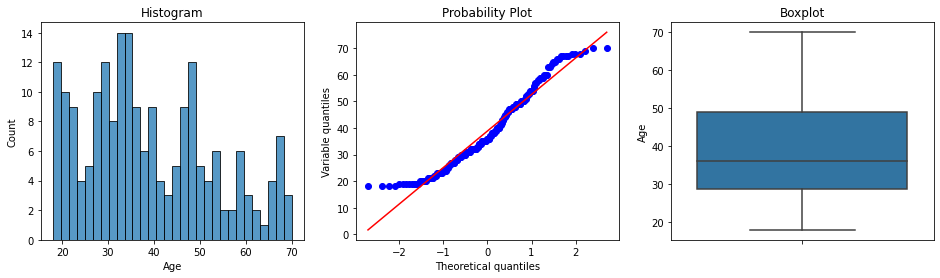

In [160]:
# Understanding the distribution of the column - Age
diagnostic_plots(Customers, 'Age')

From the above graphs, we can see that the data is slightly skewed and has no outliers.

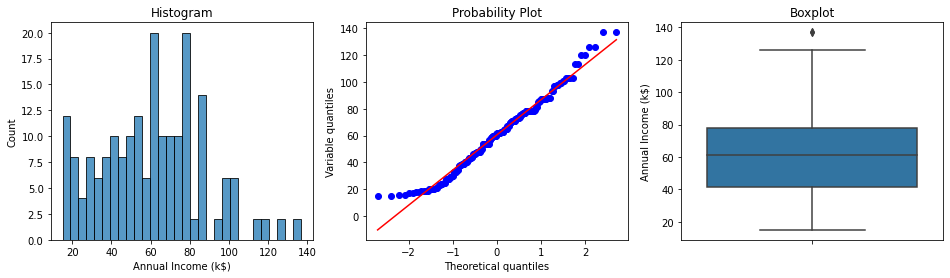

In [161]:
#Understanding the distribution of the column - Annual Income (k$)

diagnostic_plots(Customers, 'Annual Income (k$)')

From the above graph, we can see that the data has a slight degree of skewness and a hint of an outlier.

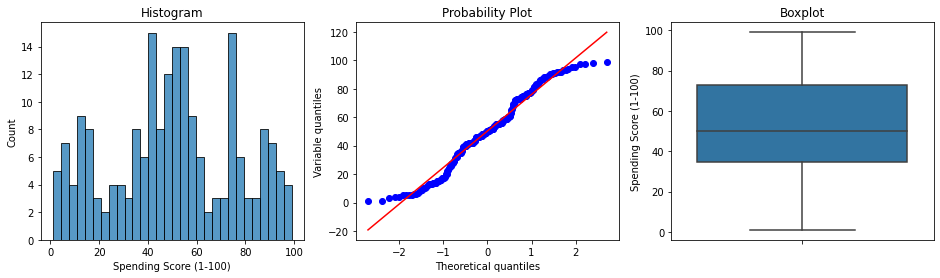

In [162]:
# Understanding the distribution of the column - Spending Score (1-100)

diagnostic_plots(Customers, 'Spending Score (1-100)')

From the above graph, we can see that the data is slightly skewed and there are no outliers.

In [163]:
# Scatterplot between Annual Income and Spending Score
fig6 = px.scatter(Customers, x='Annual Income (k$)',y='Spending Score (1-100)',color='Age',title= 'Annual Income vs Spending Score Scatter Plot')
fig6.show()

#sns.scatterplot(data = Customers, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

It is clearly seen that the younger people tend to spend more but do not have a High Income.

On the other hand The people from the Age group 30-34 & 35-39 have a high Annual Income plus they also have a High Spending Score and have a higher count in the number of customers.

So Age group 30-34 are regular customers and they should be the utmost priority

## Applying Unsupervised Learning (K - Means Clustering)


In [164]:
#Since the dataset has no missing values, we will focus on removing the counter column - CustomerID.
# Dropping the columns - CustomerId from the dataset

Customers.drop(['CustomerID'], axis = 1, inplace = True)
Customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [165]:
X = Customers.iloc[:,2:]
y = Customers.Gender

#X = Customers[['Annual Income (k$)','Spending Score (1-100)']]
#X

In [166]:
sc = StandardScaler()
X = sc.fit_transform(X)


In [167]:
from sklearn.cluster import KMeans

inertia_list = list()

for i in range(1, 15):
  km = KMeans(n_clusters= i)
  km.fit(X)
  inertia_list.append(km.inertia_)

In [168]:
inertia_list

[399.99999999999994,
 269.01679374906655,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.37581558455639,
 44.86475569922555,
 37.22818767758587,
 32.495081199100916,
 29.090568897369714,
 25.905865152509044,
 23.425475764407665,
 21.180422781517375,
 20.30790417092085]

Segmentation using Annual Income and Spending Score (K-Means)

In [169]:
# Using the elbow method to find the optimal number of clusters

wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [170]:
fig = px.line(x=np.arange(1,21,1),y=wcss,markers=True)
fig.update_layout(
    title="Elbow Method",
    xaxis_title="K Value",
    yaxis_title="WCSS",
    legend_title="Legend Title",
)
fig.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

From the graph it is clearly evident that the elbow point exist at n = 5.

## Building our model

In [171]:
# Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [172]:
y_kmeans

#here we have predicted the segmentation of our 200 customers.

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [173]:
#saving the orignal dataset.
original = Customers.copy()

In [174]:
original['cluster']  = km.labels_
#original['Gender'] = Customers['Gender']

In [175]:
original.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,16
1,Male,21,15,81,3
2,Female,20,16,6,13
3,Female,23,16,77,3
4,Female,31,17,40,16


In [176]:
original["clusters"] = y_kmeans.tolist()
#Customers["Segments"] = y_pred.tolist()


In [192]:
fig27 = px.scatter(original,x='Annual Income (k$)',y='Spending Score (1-100)',color='clusters',
                   title='2-D Visualisation of KMeans')
fig27.show()

#plt.figure(figsize= (10, 10))
#sns.scatterplot(data= original, x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "clusters",palette ='Dark2_r',
               #s=100)

In [198]:
fig8 = px.scatter_3d(original,x='clusters',y='Age',z='Spending Score (1-100)',color ='Annual Income (k$)',
                     title='3-D Visualisation of KMeans')
fig8.show()

In [194]:
# Calculating the performance of the clusters
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))

Silhouette Score : 0.55


In [195]:
# Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

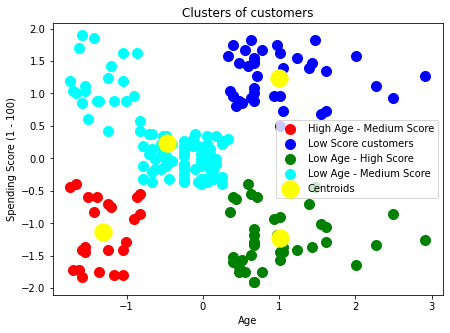

In [196]:
# Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids',)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

On the above graph, we can see that there are 4 clusters.

High Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to 40+ age group and have a 35 - 60 spending score.
    
Low Score customers: These are the customers that do not spend a lot in the mall. The target of the mall should be to reduce the number of customers in the blue cluster.
    
Low Age - High Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age group and have a spending score greater than 70.
    
Low Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age and have a spending score in the range of 35 and 65.

In [197]:
# Calculating the performance of the clusters
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = round(silhouette_score(X, y_pred), 2)


print('Silhouette Score : {}'.format(silhouette_score_kmeans))

Silhouette Score : 0.49


# Conclusion

Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.